In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

In [2]:
# Mounting project to Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
dataframe = pd.read_csv('gdrive/My Drive/major_project/small/insurance_claims.csv')

# Fetching first 5 rows
dataframe.head(5)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [4]:
# Shape of dataset => returns tuple of (rows,columns)
dataframe.shape

(1000, 39)

In [5]:
# info() => Summary of the dataframe 
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [6]:
# isna() => Finding missing values in dataframe => None found
dataframe.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

N    753
Y    247
Name: fraud_reported, dtype: int64


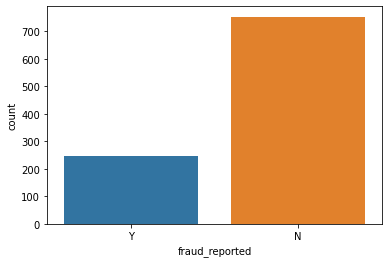

In [7]:
# Distribution of the frauds reported
print(dataframe['fraud_reported'].value_counts())
sns.countplot(x='fraud_reported', data=dataframe)

Imbalanced dataset.

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64


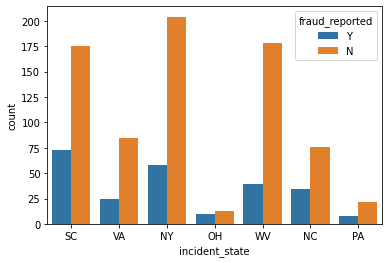

In [8]:
print(dataframe['incident_state'].value_counts())
sns.countplot(x='incident_state', data=dataframe, hue='fraud_reported')

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


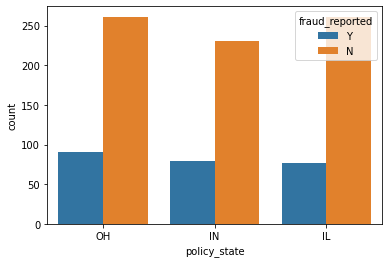

In [9]:
print(dataframe['policy_state'].value_counts())
sns.countplot(x='policy_state', data=dataframe, hue='fraud_reported')

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64


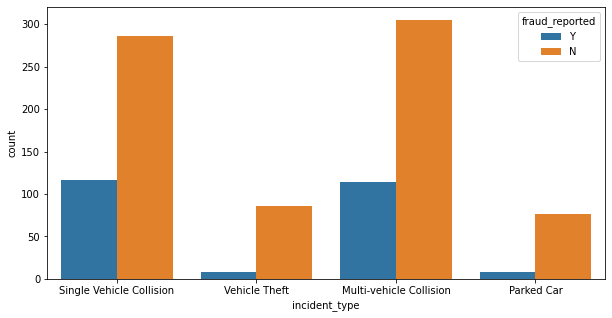

In [10]:
plt.figure(figsize=(10,5))
print(dataframe['incident_type'].value_counts())
sns.countplot(x='incident_type', data=dataframe, hue='fraud_reported')

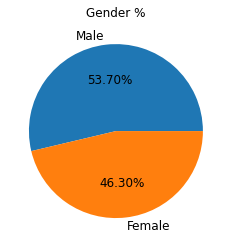

In [11]:
fig = plt.figure(figsize=(6,4))
ax = (dataframe['insured_sex'].value_counts()*100.0 /len(dataframe))\
.plot.pie(autopct='%.2f%%', labels = ['Male', 'Female'], fontsize=12)                                                                           
ax.set_title('Gender %')
ax.set(ylabel='')
plt.show()

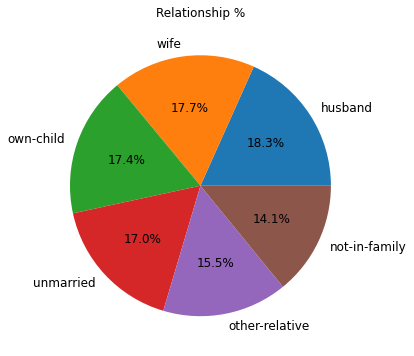

In [12]:
fig = plt.figure(figsize=(10,6))
ax = (dataframe['insured_relationship'].value_counts()*100.0 /len(dataframe))\
.plot.pie(autopct='%.1f%%',labels = ['husband', 'wife', 'own-child', 'unmarried', 'other-relative', 'not-in-family'],
         fontsize=12)                                                                           
ax.set_title('Relationship %')
# Removing Y-Axis label
ax.set(ylabel='')
plt.show()

In [13]:
dataframe.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [15]:
print(dataframe.police_report_available.value_counts())

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64


In [14]:
print(dataframe.property_damage.value_counts())

?      360
NO     338
YES    302
Name: property_damage, dtype: int64


In [16]:
print(dataframe.collision_type.value_counts())

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64


In [17]:
dataframe.replace('?', np.nan, inplace = True)

In [18]:
dataframe.isna().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [19]:
dataframe['police_report_available'] = dataframe['police_report_available'].fillna(dataframe['police_report_available'].mode()[0])
dataframe['property_damage'] = dataframe['property_damage'].fillna(dataframe['property_damage'].mode()[0])
dataframe['collision_type'] = dataframe['collision_type'].fillna(dataframe['collision_type'].mode()[0])

In [20]:
dataframe.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [22]:
dataframe['insured_sex'] = le.fit_transform(dataframe['insured_sex'])

dataframe['insured_relationship'] = le.fit_transform(dataframe['insured_relationship'])

dataframe['incident_type'] = le.fit_transform(dataframe['incident_type'])

dataframe['policy_state'] = le.fit_transform(dataframe['policy_state'])

dataframe['insured_education_level'] = le.fit_transform(dataframe['insured_education_level'])

dataframe['insured_occupation'] = le.fit_transform(dataframe['insured_occupation'])

dataframe['insured_hobbies'] = le.fit_transform(dataframe['insured_hobbies'])

dataframe['insured_relationship'] = le.fit_transform(dataframe['insured_relationship'])

dataframe['collision_type'] = le.fit_transform(dataframe['collision_type'])

dataframe['incident_severity'] = le.fit_transform(dataframe['incident_severity'])

dataframe['authorities_contacted'] = le.fit_transform(dataframe['authorities_contacted'])


dataframe['incident_state'] = le.fit_transform(dataframe['incident_state'])

dataframe['incident_city'] = le.fit_transform(dataframe['incident_city'])

dataframe['incident_location'] = le.fit_transform(dataframe['incident_location'])

dataframe['property_damage'] = le.fit_transform(dataframe['property_damage'])

dataframe['police_report_available'] = le.fit_transform(dataframe['police_report_available'])

dataframe['auto_make'] = le.fit_transform(dataframe['auto_make'])

dataframe['auto_model'] = le.fit_transform(dataframe['auto_model'])

dataframe['fraud_reported'] = le.fit_transform(dataframe['fraud_reported'])

In [ ]:
dataframe. head(3)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,2,250/500,1000,1406.91,0,466132,1,4,2,17,0,53300,0,2015-01-25,2,2,0,4,4,1,996,5,1,1,1,2,1,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,2006-06-27,1,250/500,2000,1197.22,5000000,468176,1,4,6,15,2,0,0,2015-01-21,3,1,1,4,5,5,628,8,1,0,0,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,687698,2000-09-06,2,100/300,2000,1413.14,5000000,430632,0,6,11,2,3,35100,0,2015-02-22,0,1,1,4,1,1,685,7,3,0,2,3,0,34650,7700,3850,23100,4,30,2007,0


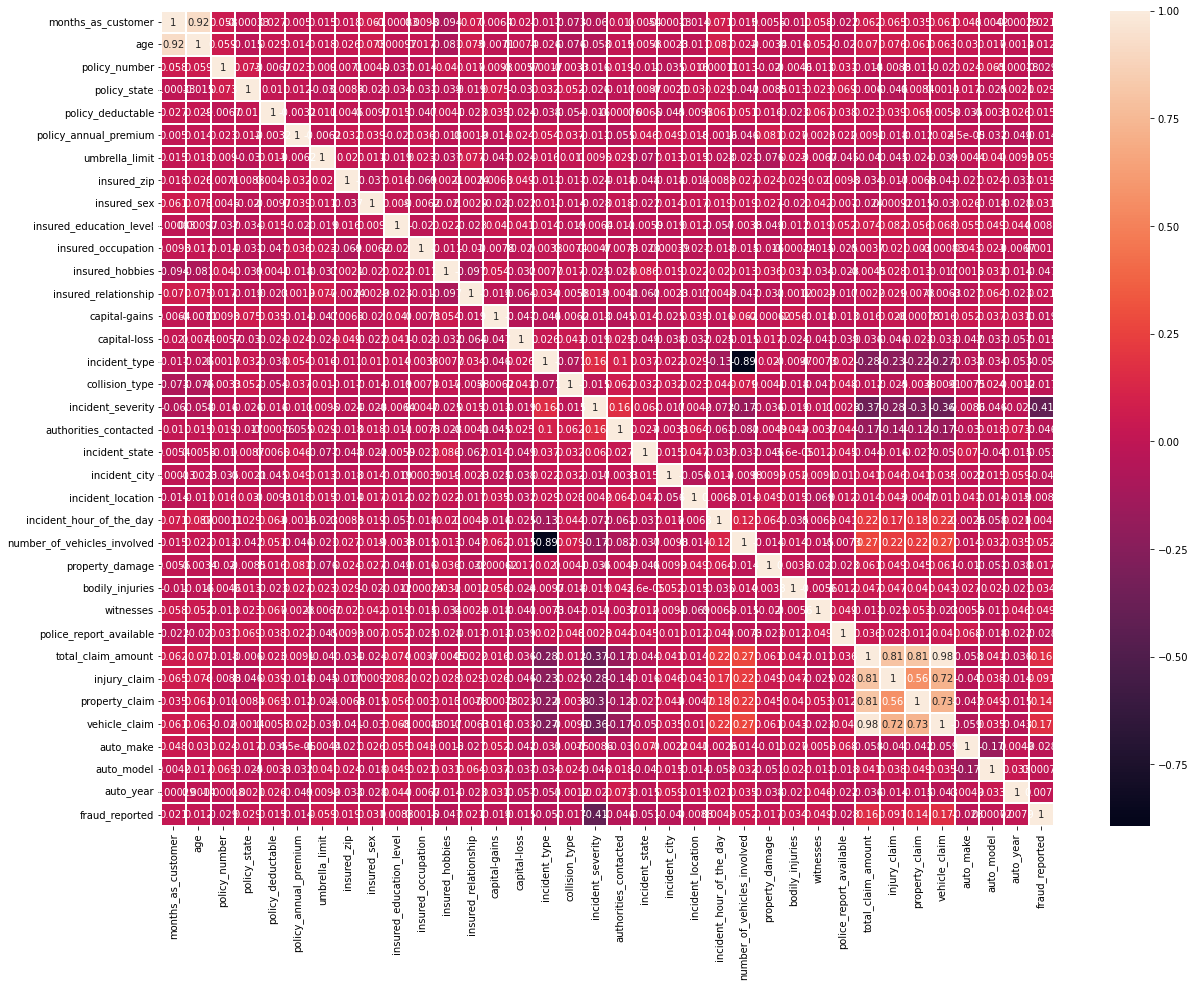

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 15))
sns.heatmap(data = dataframe.corr(), annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [24]:
corrs = dataframe.corr()['fraud_reported']
columns = corrs[corrs > .001].index
corrs = corrs.filter(columns)
corrs.sort_values(ascending=False)

fraud_reported                 1.000000
vehicle_claim                  0.170049
total_claim_amount             0.163651
property_claim                 0.137835
injury_claim                   0.090975
umbrella_limit                 0.058622
number_of_vehicles_involved    0.051839
witnesses                      0.049497
bodily_injuries                0.033877
insured_sex                    0.030873
policy_state                   0.029432
insured_relationship           0.021043
months_as_customer             0.020544
insured_zip                    0.019368
property_damage                0.017202
policy_deductable              0.014817
age                            0.012143
insured_education_level        0.008808
auto_year                      0.007928
incident_hour_of_the_day       0.004316
insured_occupation             0.001564
Name: fraud_reported, dtype: float64

In [25]:
dataframe.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [26]:
feat=['vehicle_claim','total_claim_amount','property_claim','injury_claim','umbrella_limit',\
'number_of_vehicles_involved', 'witnesses', 'bodily_injuries', 'insured_sex', 'policy_state',
'insured_relationship', 'months_as_customer', 'insured_zip', 'property_damage', 'policy_deductable',
'age', 'insured_education_level', 'auto_year', 'incident_hour_of_the_day', 'insured_occupation']

In [27]:
X = dataframe[feat]
y = dataframe.fraud_reported

In [28]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

In [29]:
y_train.value_counts()

0    565
1    185
Name: fraud_reported, dtype: int64

In [30]:
smt = SMOTE()
X_train, y_train = smt.fit_resample(X_train, y_train)
np.bincount(y_train)

array([565, 565])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.utils import plot_model

# smaller model
def build_model():
    # create model
    model = Sequential()
    model.add(Dense(256, activation='relu',input_dim=20))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    plot_model(model, 'gdrive/My Drive/major_project/small/model.png', show_shapes=True)
    return model

estimators = []
estimators.append(('standardize', MinMaxScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=build_model, epochs=100, batch_size=50, verbose=1)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X_train, y_train, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Epoch 1/100
21/21 [==============================] - 3s 10ms/step - loss: 0.6838 - accuracy: 0.5742
Epoch 2/100
21/21 [==============================] - 0s 10ms/step - loss: 0.6569 - accuracy: 0.6500
Epoch 3/100
21/21 [==============================] - 0s 12ms/step - loss: 0.6318 - accuracy: 0.6647
Epoch 4/100
21/21 [==============================] - 0s 10ms/step - loss: 0.6139 - accuracy: 0.6696
Epoch 5/100
21/21 [==============================] - 0s 6ms/step - loss: 0.6008 - accuracy: 0.6785
Epoch 6/100
21/21 [==============================] - 0s 4ms/step - loss: 0.5894 - accuracy: 0.6883
Epoch 7/100
21/21 [==============================] - 0s 4ms/step - loss: 0.5898 - accuracy: 0.6765
Epoch 8/100
21/21 [==============================] - 0s 4ms/step - loss: 0.5488 - accuracy: 0.7306
Epoch 9/100
21/21 [==============================] - 0s 4ms/step - loss: 0.5232 - accuracy: 0.7581
Epoch 10/100
21/21 [==============================] - 0s 4ms/step - loss: 0.4965 - accuracy: 0.7748
Epoch

In [ ]:
!jupyter nbconvert --to html /content/gdrive/MyDrive/major_project/small/MLP_small.ipynb

[NbConvertApp] Converting notebook /content/gdrive/MyDrive/major_project/small/MLP_small.ipynb to html
[NbConvertApp] Writing 1273181 bytes to /content/gdrive/MyDrive/major_project/small/MLP_small.html
